Fleiss Kappa After Reaching Agreement

In [7]:
import pandas as pd
import numpy as np
import re
from statsmodels.stats.inter_rater import fleiss_kappa

def clean_columns(df):
    df.columns = [re.sub(r'[\u200B-\u200D\uFEFF]', '', col).strip() for col in df.columns]
    return df

#Load and clean rating files
rater1 = clean_columns(pd.read_csv("RatingTable1.csv"))
rater2 = clean_columns(pd.read_csv("RatingTable2.csv"))
rater3 = clean_columns(pd.read_csv("RatingTable3.csv"))

dataset= pd.read_csv("FinalDataset.csv")


rater1["Group"]=dataset["Group"]
rater2["Group"]=dataset["Group"]
rater3["Group"]=dataset["Group"]


rater1Control = rater1[rater1['Group']=='C'].reset_index(drop=True)
rater1Treatment = rater1[rater1['Group']=='T'].reset_index(drop=True)

rater2Control = rater2[rater2['Group']=='C'].reset_index(drop=True)
rater2Treatment = rater2[rater2['Group']=='T'].reset_index(drop=True)

rater3Control = rater3[rater3['Group']=='C'].reset_index(drop=True)
rater3Treatment = rater3[rater3['Group']=='T'].reset_index(drop=True)
print(rater1Control.shape, rater1Treatment.shape)


dimensions = [
    'Clarity',
    'Relevance',
    'Persuasiveness',
    'Concern for Long-Term Consequences',
    'Practical Usefulness',
    'Awareness of Contextual Conditions'
]

####Control
kappa_results_Control = {}

for dim in dimensions:
    if dim not in rater1Control.columns or dim not in rater2Control.columns or dim not in rater3Control.columns:
        print(f"⚠️  Dimension '{dim}' not found in one or more files. Skipping.")
        continue

    ratings_matrix = []

    for i in range(len(rater1Control)):
        try:
            scores = [
                int(rater1Control.loc[i, dim]),
                int(rater2Control.loc[i, dim]),
                int(rater3Control.loc[i, dim])
            ]
            # Count number of ratings for each value from 1 to 5
            row = [scores.count(score) for score in range(1, 6)]
            ratings_matrix.append(row)
        except ValueError:
            print(f"⚠️  Non-numeric rating at row {i+1} in dimension '{dim}'. Skipping row.")
    
    if not ratings_matrix:
        print(f"⚠️  No valid data for dimension '{dim}'. Skipping.")
        continue

    ratings_array = np.array(ratings_matrix)
    kappa = fleiss_kappa(ratings_array)
    kappa_results_Control[dim] = kappa

# Print results
print("\n📊 Fleiss' Kappa Results (Control):")
for dim, kappa in kappa_results_Control.items():
    status = '✓' if kappa > 0.6 else '✗'
    print(f"{dim:<45} Fleiss' Kappa = {kappa:.3f} {status}")

####Treatment
kappa_results_Treatment = {}

for dim in dimensions:
    if dim not in rater1Treatment.columns or dim not in rater2Treatment.columns or dim not in rater3Treatment.columns:
        print(f"⚠️  Dimension '{dim}' not found in one or more files. Skipping.")
        continue

    ratings_matrix = []

    for i in range(len(rater1Treatment)):
        try:
            scores = [
                int(rater1Treatment.loc[i, dim]),
                int(rater2Treatment.loc[i, dim]),
                int(rater3Treatment.loc[i, dim])
            ]
            # Count number of ratings for each value from 1 to 5
            row = [scores.count(score) for score in range(1, 6)]
            ratings_matrix.append(row)
        except ValueError:
            print(f"⚠️  Non-numeric rating at row {i+1} in dimension '{dim}'. Skipping row.")
    
    if not ratings_matrix:
        print(f"⚠️  No valid data for dimension '{dim}'. Skipping.")
        continue

    ratings_array = np.array(ratings_matrix)
    kappa = fleiss_kappa(ratings_array)
    kappa_results_Treatment[dim] = kappa

# Print results
print("\n📊 Fleiss' Kappa Results (Treatment):")
for dim, kappa in kappa_results_Treatment.items():
    status = '✓' if kappa > 0.6 else '✗'
    print(f"{dim:<45} Fleiss' Kappa = {kappa:.3f} {status}")


###Total
kappa_results = {}
for dim in dimensions:
    if dim not in rater1.columns or dim not in rater2.columns or dim not in rater3.columns:
        print(f"⚠️  Dimension '{dim}' not found in one or more files. Skipping.")
        continue

    ratings_matrix = []

    for i in range(len(rater1)):
        try:
            scores = [
                int(rater1.loc[i, dim]),
                int(rater2.loc[i, dim]),
                int(rater3.loc[i, dim])
            ]
            # Count number of ratings for each value from 1 to 5
            row = [scores.count(score) for score in range(1, 6)]
            ratings_matrix.append(row)
        except ValueError:
            print(f"⚠️  Non-numeric rating at row {i+1} in dimension '{dim}'. Skipping row.")
    
    if not ratings_matrix:
        print(f"⚠️  No valid data for dimension '{dim}'. Skipping.")
        continue

    ratings_array = np.array(ratings_matrix)
    kappa = fleiss_kappa(ratings_array)
    kappa_results[dim] = kappa

# Print results
print("\n📊 Fleiss' Kappa Results (Total):")
for dim, kappa in kappa_results.items():
    status = '✓' if kappa > 0.6 else '✗'
    print(f"{dim:<45} Fleiss' Kappa = {kappa:.3f} {status}")


(25, 9) (25, 9)

📊 Fleiss' Kappa Results (Control):
Clarity                                       Fleiss' Kappa = 0.638 ✓
Relevance                                     Fleiss' Kappa = 0.627 ✓
Persuasiveness                                Fleiss' Kappa = 0.696 ✓
Concern for Long-Term Consequences            Fleiss' Kappa = 0.602 ✓
Practical Usefulness                          Fleiss' Kappa = 0.595 ✗
Awareness of Contextual Conditions            Fleiss' Kappa = 0.592 ✗

📊 Fleiss' Kappa Results (Treatment):
Clarity                                       Fleiss' Kappa = 0.631 ✓
Relevance                                     Fleiss' Kappa = 0.794 ✓
Persuasiveness                                Fleiss' Kappa = 0.625 ✓
Concern for Long-Term Consequences            Fleiss' Kappa = 0.681 ✓
Practical Usefulness                          Fleiss' Kappa = 0.709 ✓
Awareness of Contextual Conditions            Fleiss' Kappa = 0.672 ✓

📊 Fleiss' Kappa Results (Total):
Clarity                             

Adding Manually Group and DilemmaID ---> FinalDataset.csv

Complete Version

SAMPLE SIZE VERIFICATION:
Group
T    25
C    25
Name: count, dtype: int64
Total sample: 50
✅ Sample sizes confirmed: 25 per group

=== COMPREHENSIVE STATISTICAL ANALYSIS ===

Creating visualizations...


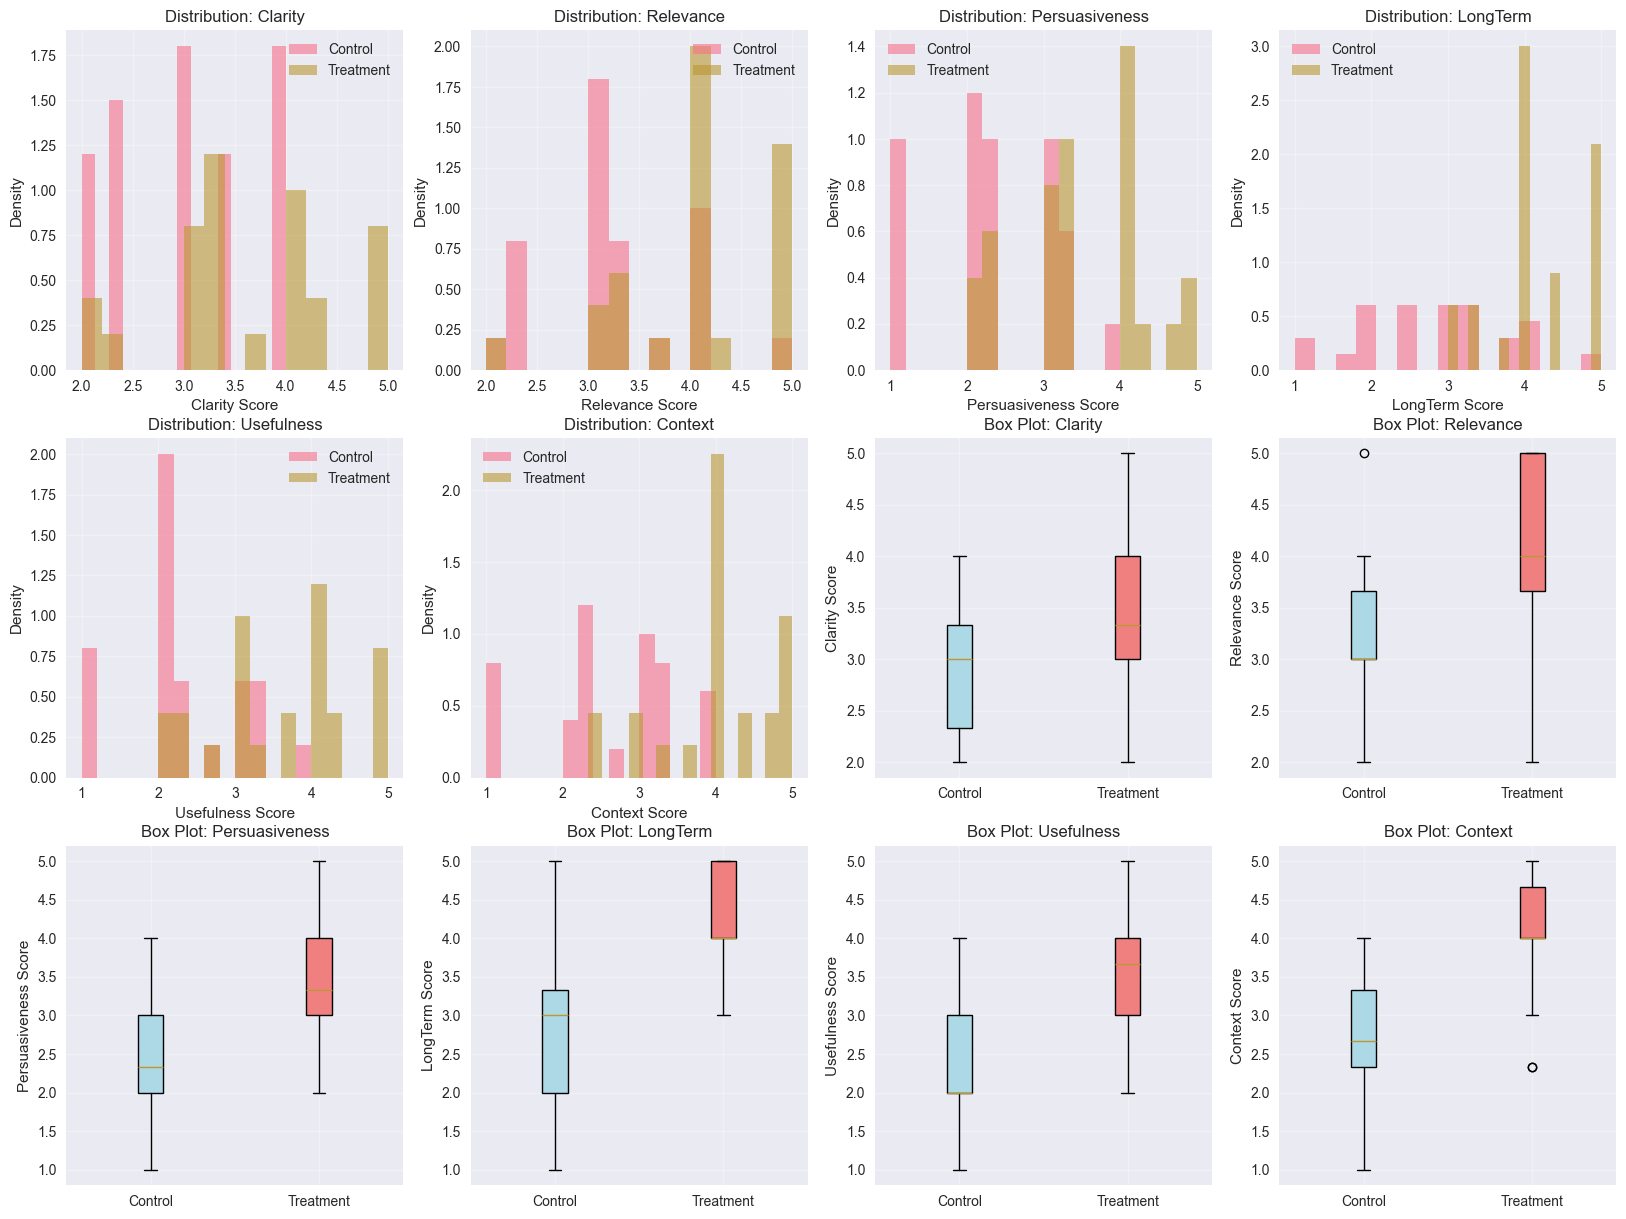

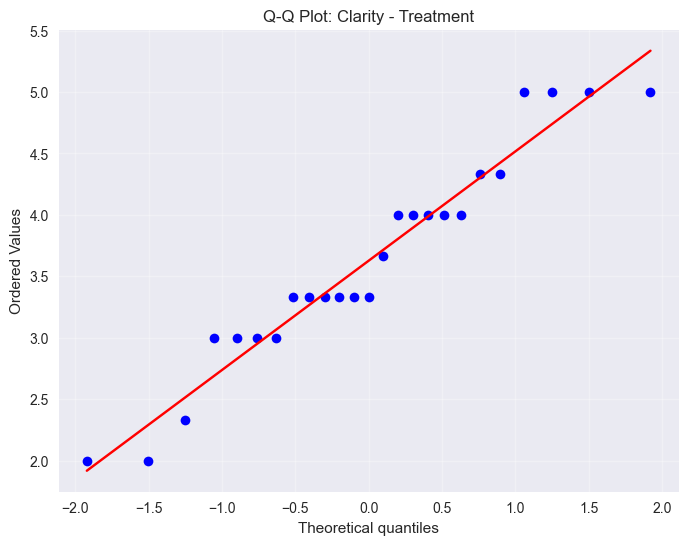

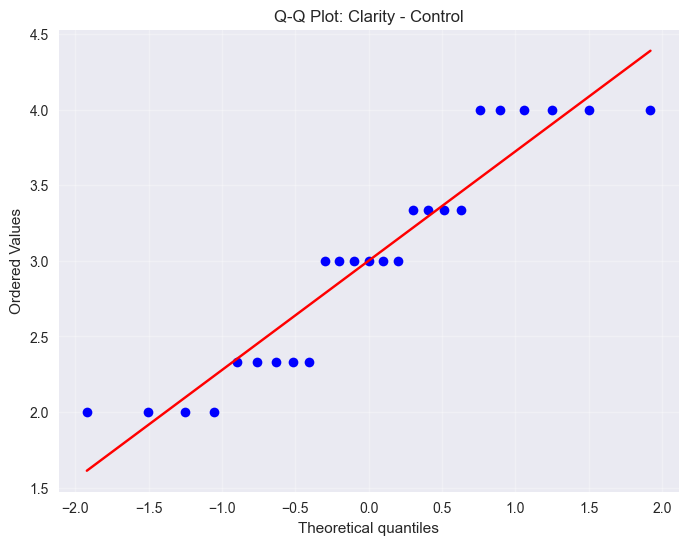

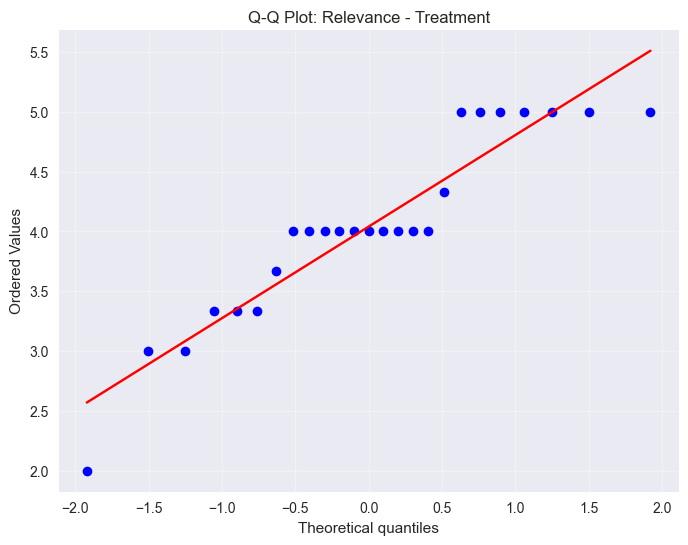

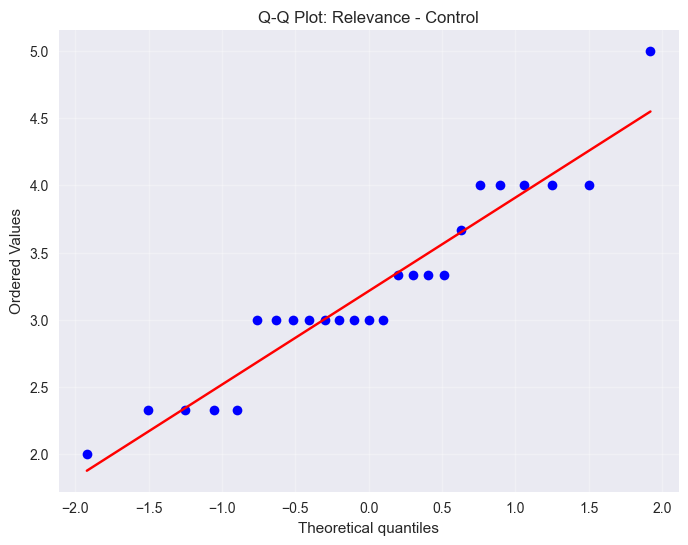

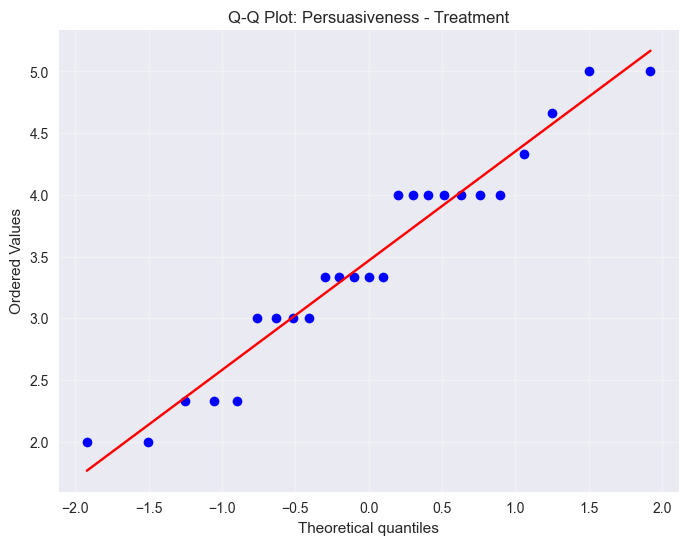

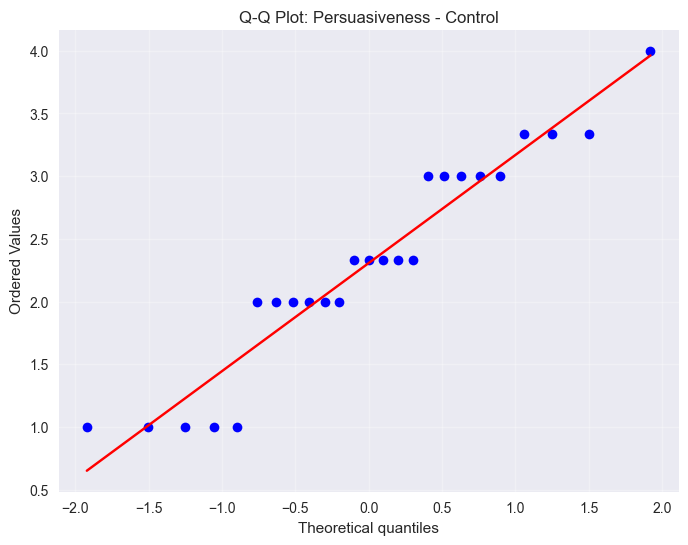

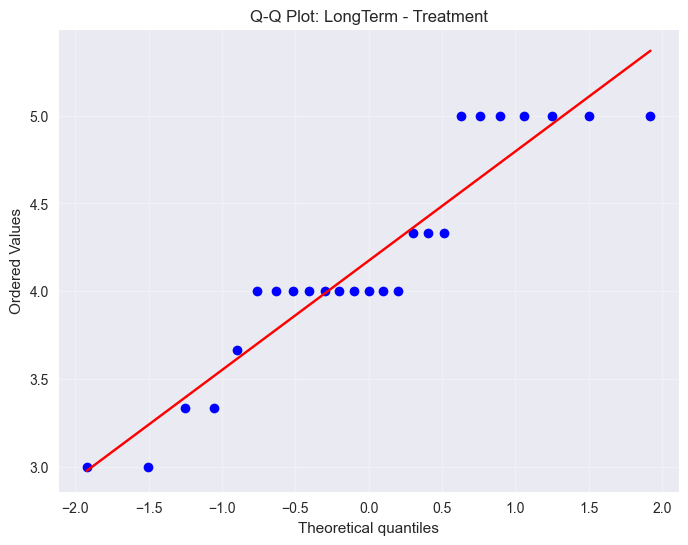

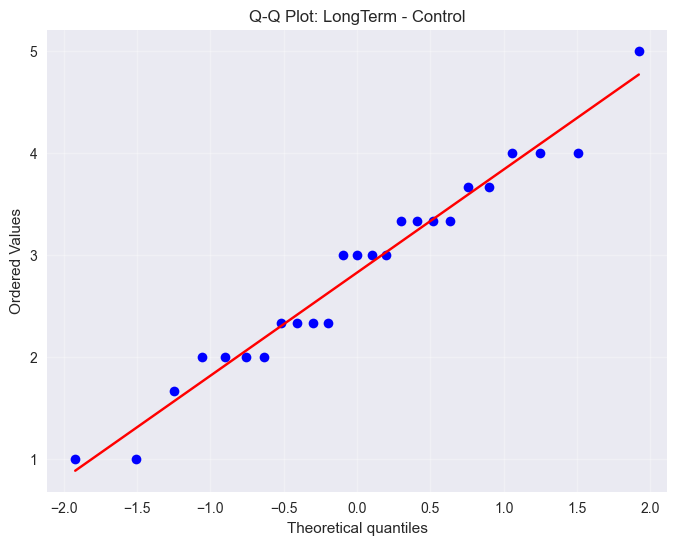

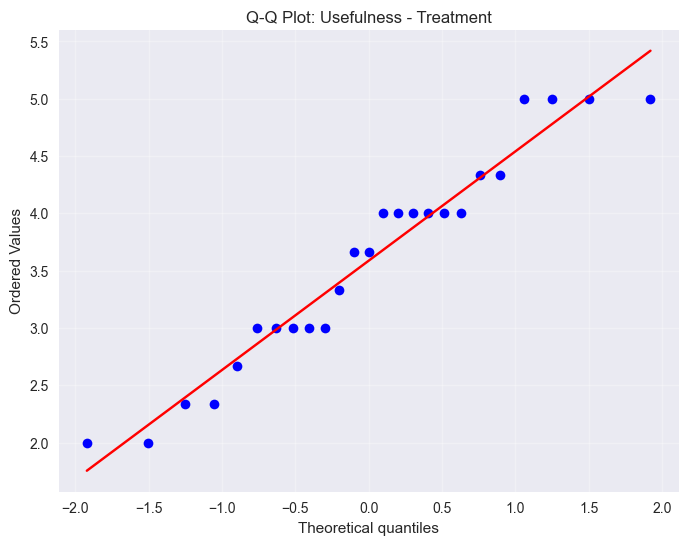

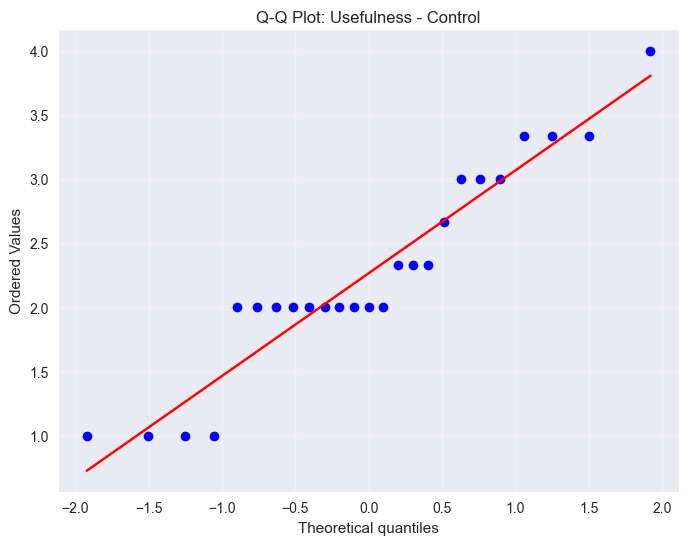

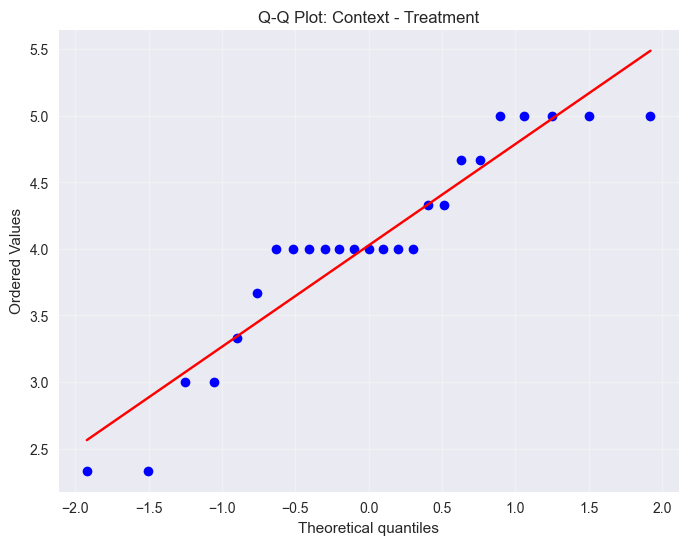

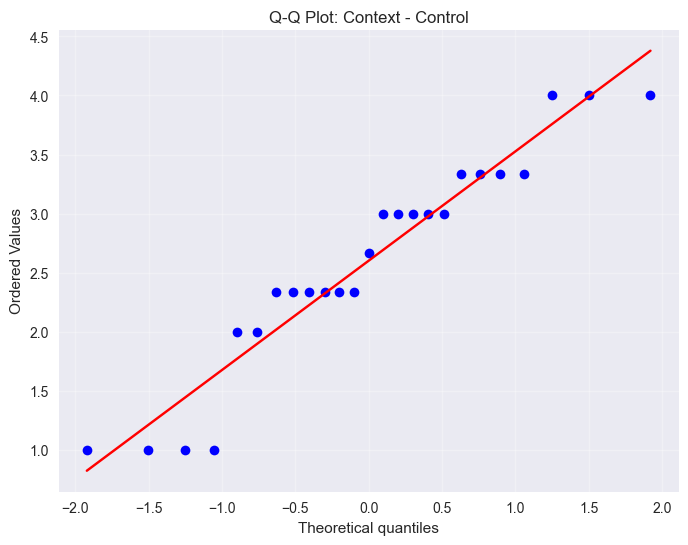

<Figure size 800x550 with 0 Axes>


=== DETAILED RESULTS BY DIMENSION ===


DIMENSION: CLARITY

DESCRIPTIVE STATISTICS:
Treatment: n=25, mean=3.627, median=3.333, std=0.873
Control:   n=25, mean=3.000, median=3.000, std=0.726
Mean difference: 0.627
Median difference: 0.333

NORMALITY ASSESSMENT:
Treatment Shapiro-Wilk: W=0.9385, p=0.1365
Control Shapiro-Wilk:   W=0.8817, p=0.0075
Both groups normal: No
⚠️  Borderline normality - recommend visual inspection

STATISTICAL TEST: Mann-Whitney U
Test statistic: 439.5000
p-value (one-tailed): 0.006342
Estimated statistical power: 0.788

EFFECT SIZES:
Cohen's d: 0.780
Rank-biserial correlation: 0.406
Common Language Effect Size: 0.703
Effect magnitude: medium (Cohen's d = 0.780)

BOOTSTRAP 95% CI for median difference: [0.000, 1.333]

RESULT: ✅ SIGNIFICANT

DIMENSION: RELEVANCE

DESCRIPTIVE STATISTICS:
Treatment: n=25, mean=4.040, median=4.000, std=0.778
Control:   n=25, mean=3.213, median=3.000, std=0.693
Mean difference: 0.827
Median difference: 1.000

NORMALITY ASSESSMENT:
T

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from scipy.stats import ranksums, permutation_test
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv("FinalDataset.csv")

# Verify sample sizes
print("SAMPLE SIZE VERIFICATION:")
print(df['Group'].value_counts())
print(f"Total sample: {len(df)}")
assert len(df) == 50, f"Expected 50 rows, got {len(df)}"
assert df['Group'].value_counts()['T'] == 25, "Expected 25 treatment cases"
assert df['Group'].value_counts()['C'] == 25, "Expected 25 control cases"
print("✅ Sample sizes confirmed: 25 per group\n")

# Clean column names for convenience
df = df.rename(columns={
    'Concern for Long-Term Consequences': 'LongTerm',
    'Practical Usefulness': 'Usefulness',
    'Awareness of Contextual Conditions': 'Context'
})

# List of dimensions
dimensions = ['Clarity', 'Relevance', 'Persuasiveness', 'LongTerm', 'Usefulness', 'Context']

# Separate into groups
treatment = df[df['Group'] == 'T']
control = df[df['Group'] == 'C']

# =============================================================================
# 1. VISUALIZATION SECTION
# =============================================================================
def qq_plot_check(data, title):
    """Create Q-Q plot for normality assessment - important for small samples"""
    from scipy import stats
    
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {title}')
    plt.grid(True, alpha=0.3)
    plt.show()

def create_comprehensive_plots(df, dimensions):
    """Create comprehensive visualization plots"""
    
    # Set up the plotting area
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Distribution plots for each dimension
    for i, dim in enumerate(dimensions, 1):
        plt.subplot(3, 4, i)
        
        # Get data for both groups
        treatment_data = df[df['Group'] == 'T'][dim].dropna()
        control_data = df[df['Group'] == 'C'][dim].dropna()
        
        # Create histogram with overlay
        plt.hist(control_data, alpha=0.6, label='Control', bins=15, density=True)
        plt.hist(treatment_data, alpha=0.6, label='Treatment', bins=15, density=True)
        plt.xlabel(f'{dim} Score')
        plt.ylabel('Density')
        plt.title(f'Distribution: {dim}')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 2. Box plots comparison
    for i, dim in enumerate(dimensions, 7):
        plt.subplot(3, 4, i)
        
        # Prepare data for box plot
        data_to_plot = [df[df['Group'] == 'C'][dim].dropna(), 
                       df[df['Group'] == 'T'][dim].dropna()]
        
        box_plot = plt.boxplot(data_to_plot, labels=['Control', 'Treatment'], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        box_plot['boxes'][1].set_facecolor('lightcoral')
        
        plt.ylabel(f'{dim} Score')
        plt.title(f'Box Plot: {dim}')
        plt.grid(True, alpha=0.3)
    for i, dim in enumerate(dimensions,7):
        treatment_data = df[df['Group'] == 'T'][dim].dropna()
        control_data = df[df['Group'] == 'C'][dim].dropna()
        qq_plot_check(treatment_data, f'{dim} - Treatment')
        qq_plot_check(control_data, f'{dim} - Control')
    
    plt.tight_layout()
    plt.savefig('comprehensive_analysis_plots.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 2. EFFECT SIZE CALCULATIONS
# =============================================================================

def calculate_effect_sizes_corrected(group1, group2):
    """Calculate effect sizes with corrected rank-biserial correlation"""
    
    # Cohen's d
    pooled_std = np.sqrt(((len(group1) - 1) * group1.var() + (len(group2) - 1) * group2.var()) / 
                        (len(group1) + len(group2) - 2))
    cohens_d = (group1.mean() - group2.mean()) / pooled_std
    
    # Corrected rank-biserial correlation calculation
    n1, n2 = len(group1), len(group2)
    
    # Get U statistics for both directions
    U1, _ = mannwhitneyu(group1, group2, alternative='two-sided')
    U2 = n1 * n2 - U1  # The other U statistic
    
    # Use the smaller U for rank-biserial calculation
    U_min = min(U1, U2)
    
    # Rank-biserial correlation (corrected)
    # Positive when group1 > group2, negative when group1 < group2
    if group1.median() > group2.median():
        rank_biserial = 1 - (2 * U_min) / (n1 * n2)
    else:
        rank_biserial = -1 + (2 * U_min) / (n1 * n2)
    
    
    # Common Language Effect Size
    cles = U1 / (n1 * n2)
    
    return {
        'cohens_d': cohens_d,
        'rank_biserial': rank_biserial,
        'cles': cles,
        'U1': U1,
        'U2': U2
    }

# =============================================================================
# 3. BOOTSTRAP CONFIDENCE INTERVALS
# =============================================================================

def bootstrap_median_difference(group1, group2, n_bootstrap=10000):
    """Calculate bootstrap confidence interval for median difference - optimized for n=25"""
    
    def median_diff(x, y):
        return np.median(x) - np.median(y)
    
    bootstrap_diffs = []
    n1, n2 = len(group1), len(group2)
    
    # For small samples, use more bootstrap iterations for stability
    for _ in range(n_bootstrap):
        # Resample with replacement
        sample1 = np.random.choice(group1, size=n1, replace=True)
        sample2 = np.random.choice(group2, size=n2, replace=True)
        bootstrap_diffs.append(median_diff(sample1, sample2))
    
    # Calculate confidence interval
    ci_lower = np.percentile(bootstrap_diffs, 2.5)
    ci_upper = np.percentile(bootstrap_diffs, 97.5)
    
    return ci_lower, ci_upper, bootstrap_diffs

def calculate_power_analysis(group1, group2, alpha=0.05):
    """Estimate statistical power for the given sample sizes"""
    from scipy.stats import norm
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt(((len(group1) - 1) * group1.var() + (len(group2) - 1) * group2.var()) / 
                        (len(group1) + len(group2) - 2))
    effect_size = abs(group1.mean() - group2.mean()) / pooled_std
    
    # Approximate power calculation for two-sample test
    n_per_group = len(group1)  # assuming equal n
    z_alpha = norm.ppf(1 - alpha/2)  # two-tailed
    z_beta = effect_size * np.sqrt(n_per_group/2) - z_alpha
    power = norm.cdf(z_beta)
    
    return power, effect_size

# =============================================================================
# 4. COMPREHENSIVE STATISTICAL ANALYSIS
# =============================================================================

print("=== COMPREHENSIVE STATISTICAL ANALYSIS ===\n")
print("Creating visualizations...")
create_comprehensive_plots(df, dimensions)


# Store results for multiple comparison correction
p_values = []
results_summary = []

print("\n=== DETAILED RESULTS BY DIMENSION ===\n")

for dim in dimensions:
    print(f"\n{'='*50}")
    print(f"DIMENSION: {dim.upper()}")
    print(f"{'='*50}")
    
    # Get data
    t_vals = treatment[dim].dropna()
    c_vals = control[dim].dropna()
    
    # Descriptive statistics
    print(f"\nDESCRIPTIVE STATISTICS:")
    print(f"Treatment: n={len(t_vals)}, mean={t_vals.mean():.3f}, median={t_vals.median():.3f}, std={t_vals.std():.3f}")
    print(f"Control:   n={len(c_vals)}, mean={c_vals.mean():.3f}, median={c_vals.median():.3f}, std={c_vals.std():.3f}")
    print(f"Mean difference: {t_vals.mean() - c_vals.mean():.3f}")
    print(f"Median difference: {t_vals.median() - c_vals.median():.3f}")
    
    # Normality tests + visual inspection (important for n=25)
    shapiro_t = shapiro(t_vals)
    shapiro_c = shapiro(c_vals)
    normal = shapiro_t.pvalue > 0.05 and shapiro_c.pvalue > 0.05
    
    print(f"\nNORMALITY ASSESSMENT:")
    print(f"Treatment Shapiro-Wilk: W={shapiro_t.statistic:.4f}, p={shapiro_t.pvalue:.4f}")
    print(f"Control Shapiro-Wilk:   W={shapiro_c.statistic:.4f}, p={shapiro_c.pvalue:.4f}")
    print(f"Both groups normal: {'Yes' if normal else 'No'}")
    
    # For small samples, also check Q-Q plots visually
    if shapiro_t.pvalue < 0.10 or shapiro_c.pvalue < 0.10:  # borderline cases
        print("⚠️  Borderline normality - recommend visual inspection")
        # Uncomment next lines to show Q-Q plots
    
    # Statistical test
    if normal:
        stat, p_val = ttest_ind(t_vals, c_vals, alternative='greater')
        test_name = "Independent t-test"
    else:
        stat, p_val = mannwhitneyu(t_vals, c_vals, alternative='greater')
        test_name = "Mann-Whitney U"
    
    p_values.append(p_val)
    
    print(f"\nSTATISTICAL TEST: {test_name}")
    print(f"Test statistic: {stat:.4f}")
    print(f"p-value (one-tailed): {p_val:.6f}")
    
    # Power analysis (especially important for n=25)
    power, cohen_d = calculate_power_analysis(t_vals, c_vals)
    print(f"Estimated statistical power: {power:.3f}")
    
    # Effect sizes
    effect_sizes = calculate_effect_sizes_corrected(t_vals, c_vals)
    print(f"\nEFFECT SIZES:")
    print(f"Cohen's d: {effect_sizes['cohens_d']:.3f}")
    print(f"Rank-biserial correlation: {effect_sizes['rank_biserial']:.3f}")
    print(f"Common Language Effect Size: {effect_sizes['cles']:.3f}")
    
    # Effect size interpretation for small samples
    d_magnitude = abs(effect_sizes['cohens_d'])
    r_magnitude = abs(effect_sizes['rank_biserial'])
    
    if d_magnitude < 0.2:
        effect_interp = "negligible"
    elif d_magnitude < 0.5:
        effect_interp = "small"
    elif d_magnitude < 0.8:
        effect_interp = "medium"
    else:
        effect_interp = "large"
    
    print(f"Effect magnitude: {effect_interp} (Cohen's d = {effect_sizes['cohens_d']:.3f})")
    
    # Bootstrap confidence interval
    ci_lower, ci_upper, _ = bootstrap_median_difference(t_vals, c_vals)
    print(f"\nBOOTSTRAP 95% CI for median difference: [{ci_lower:.3f}, {ci_upper:.3f}]")
    
    # Interpretation
    significance = "✅ SIGNIFICANT" if p_val < 0.05 else "❌ NOT SIGNIFICANT"
    print(f"\nRESULT: {significance}")
    
    # Store for summary
    results_summary.append({
        'dimension': dim,
        'treatment_mean': t_vals.mean(),
        'control_mean': c_vals.mean(),
        'treatment_median': t_vals.median(),
        'control_median': c_vals.median(),
        'test': test_name,
        'statistic': stat,
        'p_value': p_val,
        'cohens_d': effect_sizes['cohens_d'],
        'rank_biserial': effect_sizes['rank_biserial'],
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    })

# =============================================================================
# 5. MULTIPLE COMPARISON CORRECTION
# =============================================================================

print(f"\n{'='*70}")
print("MULTIPLE COMPARISON CORRECTION")
print(f"{'='*70}")

# Bonferroni correction
alpha = 0.05
bonferroni_alpha = alpha / len(dimensions)
print(f"Original alpha: {alpha}")
print(f"Bonferroni corrected alpha: {bonferroni_alpha:.4f}")

# FDR correction (recommended for n=25 per group)
reject_fdr, p_corrected_fdr, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

print(f"\nCORRECTED RESULTS (recommended: FDR for small samples):")
print(f"{'Dimension':<15} | {'p-value':<8} | {'Bonferroni':<12} | {'FDR':<12}")
print("-" * 55)

for i, dim in enumerate(dimensions):
    bonf_sig = "✅ p<.008" if p_values[i] < bonferroni_alpha else "❌ n.s."
    fdr_sig = "✅ significant" if reject_fdr[i] else "❌ n.s."
    
    print(f"{dim:<15} | {p_values[i]:<8.4f} | {bonf_sig:<12} | {fdr_sig:<12}")

# Count significant results
n_bonf_sig = sum([p < bonferroni_alpha for p in p_values])
n_fdr_sig = sum(reject_fdr)

print(f"\nSUMMARY:")
print(f"Significant with Bonferroni: {n_bonf_sig}/6 dimensions")
print(f"Significant with FDR: {n_fdr_sig}/6 dimensions")
print(f"\n💡 RECOMMENDATION: Use FDR correction for n=25 per group to balance Type I/II error risk")

# =============================================================================
# 6. SUMMARY TABLE
# =============================================================================

print(f"\n{'='*70}")
print("SUMMARY TABLE")
print(f"{'='*70}")

summary_df = pd.DataFrame(results_summary)
summary_df['bonferroni_sig'] = summary_df['p_value'] < bonferroni_alpha
summary_df['fdr_sig'] = reject_fdr

print(summary_df[['dimension', 'treatment_median', 'control_median', 
                 'p_value', 'rank_biserial', 'bonferroni_sig', 'fdr_sig']].round(3))

# Save results
summary_df.to_csv('statistical_analysis_results.csv', index=False)
print(f"\nResults saved to 'statistical_analysis_results.csv'")

# =============================================================================
# 7. RECOMMENDATIONS
# =============================================================================

print(f"\n{'='*70}")
print("RECOMMENDATIONS FOR n=25 PER GROUP")
print(f"{'='*70}")

print("""
SPECIFIC RECOMMENDATIONS FOR YOUR SAMPLE SIZE:

1. STATISTICAL APPROACH:
   ✅ Mann-Whitney U is excellent for n=25 per group
   ✅ Averaged Likert ratings are completely appropriate  
   ✅ One-tailed tests are fine if you predicted direction

2. MULTIPLE COMPARISONS:
   💡 Use FDR correction rather than Bonferroni (less risk of Type II error)
   💡 Report both uncorrected and corrected results for transparency

3. EFFECT SIZES (crucial for n=25):
   💡 Always report confidence intervals for effect sizes
   💡 Focus on rank-biserial correlation (most appropriate for Mann-Whitney U)
   💡 Cohen's d ≥ 0.5 is meaningful for practical significance

4. POWER CONSIDERATIONS:
   ⚠️  With n=25, you have ~80% power to detect medium effects (d≈0.5)
   ⚠️  Smaller effects might be missed (Type II error risk)
   💡 Consider this when interpreting non-significant results

5. REPORTING TEMPLATE for n=25:
   "Treatment group showed higher median ratings (Mdn = X.XX) compared to 
   control group (Mdn = X.XX). Mann-Whitney U test revealed [significant/
   non-significant] difference (U = XX.X, p = .XXX, rank-biserial r = .XX, 
   95% CI for median difference: [X.XX, X.XX])."

6. VISUALIZATION PRIORITIES:
   💡 Box plots show median differences clearly
   💡 Individual data points overlay (with n=25, this is feasible)
   💡 Effect size visualization with confidence intervals

YOUR CURRENT APPROACH IS METHODOLOGICALLY SOUND FOR n=25 PER GROUP!
""")

print(f"\n{'='*70}")
print("FINAL VALIDATION")
print(f"{'='*70}")